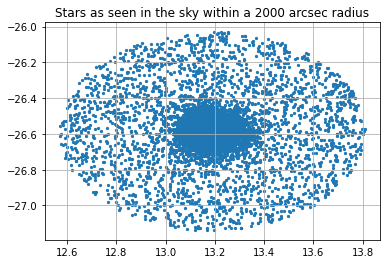

17237


In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
#opening file
f = Table.read('ngc288.vot')
#position data
ra = f['ra'] #right ascension
dec = f['dec'] #declination
par = f['parallax'] #parallax 
#plotting
plt.scatter(ra, dec, s=5)
plt.title("Stars as seen in the sky within a 2000 arcsec radius")
plt.grid()
plt.show()
#number of points
print(len(f))

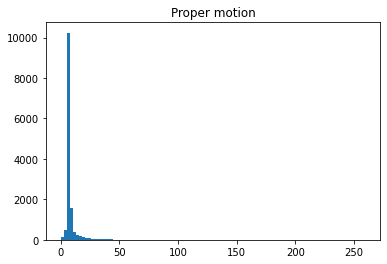

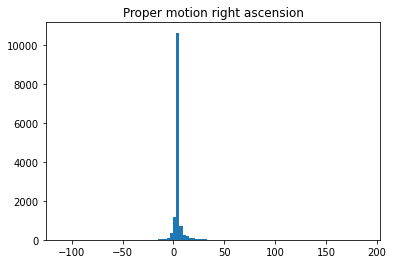

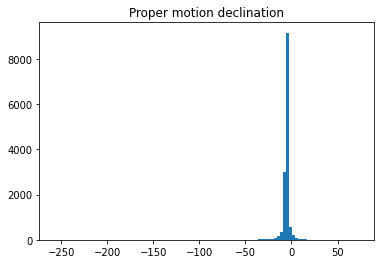

In [2]:
#motion data
pm = f['pm'] #proper motion
pmra = f['pmra'] #proper motion ra
pmdec = f['pmdec'] #proper motion dec

plt.hist(pm, bins=100)
plt.title("Proper motion")
plt.show()
plt.hist(pmra, bins=100)
plt.title("Proper motion right ascension")
plt.show()
plt.hist(pmdec, bins=100)
plt.title("Proper motion declination")
plt.show()

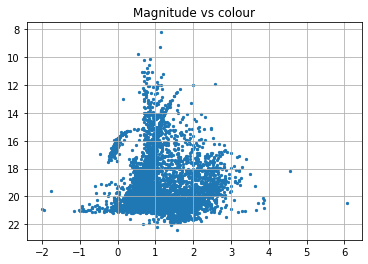

In [3]:
#colour, brightness data
mag = f['phot_g_mean_mag'] #magnitude G band
colour = f['bp_rp'] #Colour BP-RP
plt.scatter(colour, mag, s=5)
plt.grid()
plt.gca().invert_yaxis()
plt.title('Magnitude vs colour')
plt.show()

Proper motion right ascension = 4.673924460374953 ± 6.425632095584595
Proper motion declination = -6.007271217416404 ± 5.950824426500624
Proper motion = 8.63452644110051 ± 7.751057463798756


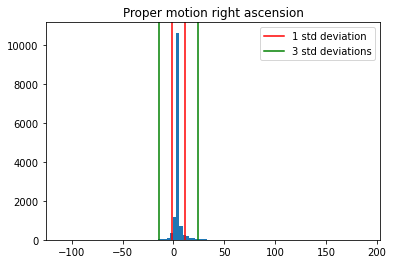

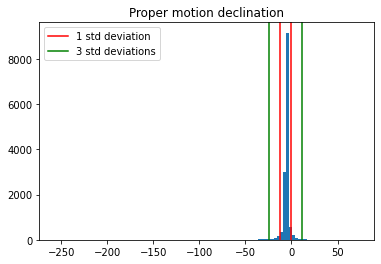

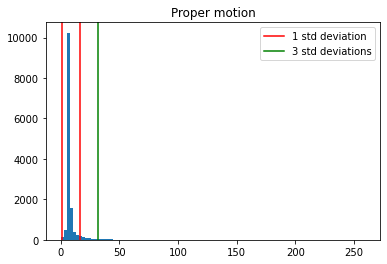

In [4]:
#Analysis of proper motion
pmra_mean = pmra.mean()
pmdec_mean = pmdec.mean()
pmra_s = pmra.std()
pmdec_s = pmdec.std()
pm_mean = pm.mean()
pm_s = pm.std()

print("Proper motion right ascension =",pmra_mean, u"\u00B1", pmra_s)
print('Proper motion declination =', pmdec_mean, u"\u00B1", pmdec_s)
print('Proper motion =', pm_mean, u"\u00B1", pm_s)

plt.hist(pmra, bins=100)
plt.title("Proper motion right ascension")
#Vertical lines indicating 1 std deviation
plt.axvline(pmra_mean+pmra_s, color='r', label='1 std deviation')
plt.axvline(pmra_mean-pmra_s, color='r')
#Vertical lines indicating 3 std deviations
plt.axvline(pmra_mean+3*pmra_s, color='g', label='3 std deviations')
plt.axvline(pmra_mean-3*pmra_s, color='g')
plt.legend()
plt.show()

plt.hist(pmdec, bins=100)
plt.title("Proper motion declination")
#Vertical lines indicating 1 std deviation
plt.axvline(pmdec_mean+pmdec_s, color='r', label='1 std deviation')
plt.axvline(pmdec_mean-pmdec_s, color='r')
#Vertical lines indicating 3 std deviations
plt.axvline(pmdec_mean+3*pmdec_s, color='g', label='3 std deviations')
plt.axvline(pmdec_mean-3*pmdec_s, color='g')
plt.legend()
plt.show()

plt.hist(pm, bins=100)
plt.title("Proper motion")
#Vertical lines indicating 1 std deviation
plt.axvline(pm_mean+pm_s, color='r', label='1 std deviation')
plt.axvline(pm_mean-pm_s, color='r')
#Vertical lines indicating 3 std deviations
plt.axvline(pm_mean+3*pm_s, color='g', label='3 std deviations')
plt.legend()
plt.show()

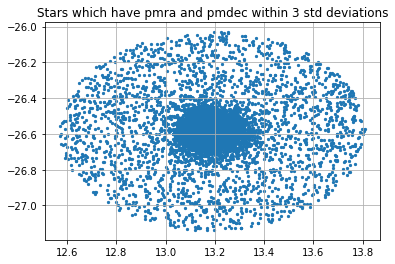

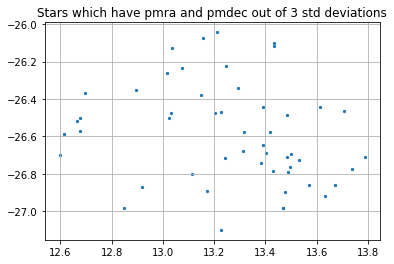

In [5]:
plt.grid()
plt.title('Stars which have pmra and pmdec within 3 std deviations')
#Dividing stars with proper motion right ascension too big from those who are more or less in a range
#If a star is too fast I append its coordinates in the too fast arrays, otherwise in the "in cluster"
#The operation will be repeated in the next cells for 3 standard deviations and for 1 standard deviation
in_clu_ra3 = []
in_clu_dec3 = []
too_fast_ra3 = []
too_fast_dec3 = []
for i in range(17237):
    if pmra[i]>pmra_mean+3*pmra_s:
        if pmdec[i]>pmdec_mean+3*pmdec_s:
            too_fast_ra3.append(ra[i])
            too_fast_dec3.append(dec[i])
    elif pmra[i]<pmra_mean-3*pmra_s:
        if pmdec[i]<pmdec_mean-3*pmdec_s:
            too_fast_ra3.append(ra[i])
            too_fast_dec3.append(dec[i])
    else:
        in_clu_ra3.append(ra[i])
        in_clu_dec3.append(dec[i])
        
plt.scatter(in_clu_ra3, in_clu_dec3, s=5)
plt.show()

plt.title('Stars which have pmra and pmdec out of 3 std deviations')
plt.grid()
plt.scatter(too_fast_ra3, too_fast_dec3, s=5)
plt.show()

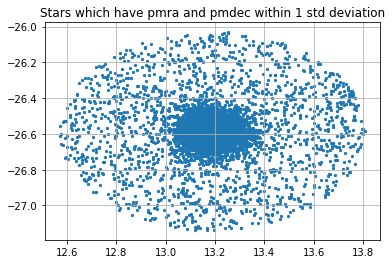

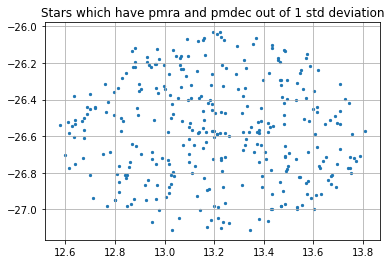

In [55]:
plt.grid()
plt.title('Stars which have pmra and pmdec within 1 std deviation')
#Dividing stars with proper motion right ascension too big from those who are more or less in a range
in_clu_ra = []
in_clu_dec = []
too_fast_ra = []
too_fast_dec = []
pmra_inclu = []
pmdec_inclu = []
for i in range(17237):
    if pmra[i]>pmra_mean+pmra_s:
        if pmdec[i]>pmdec_mean+pmdec_s:
            too_fast_ra.append(ra[i])
            too_fast_dec.append(dec[i])
    elif pmra[i]<pmra_mean-pmra_s:
        if pmdec[i]<pmdec_mean-pmdec_s:
            too_fast_ra.append(ra[i])
            too_fast_dec.append(dec[i])
    else:
        in_clu_ra.append(ra[i])
        in_clu_dec.append(dec[i])
        pmra_inclu.append(pmra[i])
        pmdec_inclu.append(pmdec[i])
        
plt.scatter(in_clu_ra, in_clu_dec, s=5)
plt.show()

plt.title('Stars which have pmra and pmdec out of 1 std deviation')
plt.grid()
plt.scatter(too_fast_ra, too_fast_dec, s=5)
plt.show()

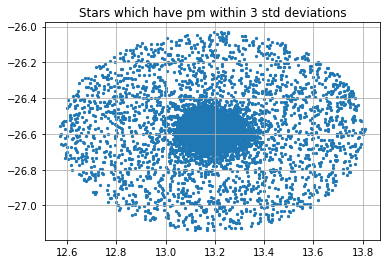

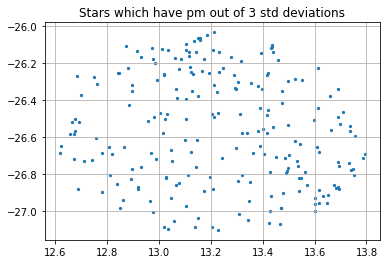

In [56]:
plt.grid()
plt.title('Stars which have pm within 3 std deviations')
#Dividing stars with proper motion right ascension too big from those who are more or less in a range
pmin_r3 = []
pmin_d3 = []
pmtf_r3 = []
pmtf_d3 = []
for i in range(17237):
    if pm[i]>pm_mean+3*pm_s:
        pmtf_r3.append(ra[i])
        pmtf_d3.append(dec[i])
    elif pm[i]<pm_mean-3*pm_s:
        pmtf_r3.append(ra[i])
        pmtf_d3.append(dec[i])
    else:
        pmin_r3.append(ra[i])
        pmin_d3.append(dec[i])
        
plt.scatter(pmin_r3, pmin_d3, s=5)
plt.show()

plt.title('Stars which have pm out of 3 std deviations')
plt.grid()
plt.scatter(pmtf_r3, pmtf_d3, s=5)
plt.show()

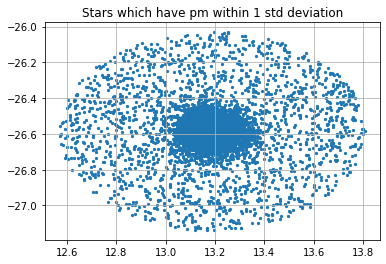

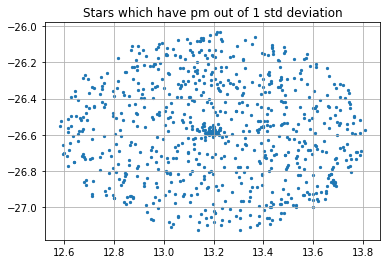

In [57]:
plt.grid()
plt.title('Stars which have pm within 1 std deviation')
#Dividing stars with proper motion right ascension too big from those who are more or less in a range
pmin_r = []
pmin_d = []
pmtf_r = [] #too fast
pmtf_d = [] #too fast
for i in range(17237):
    if pm[i]>pm_mean+pm_s:
        pmtf_r.append(ra[i])
        pmtf_d.append(dec[i])
    elif pm[i]<pm_mean-pm_s:
        pmtf_r.append(ra[i])
        pmtf_d.append(dec[i])
    else:
        pmin_r.append(ra[i])
        pmin_d.append(dec[i])
        
plt.scatter(pmin_r, pmin_d, s=5)
plt.show()

plt.title('Stars which have pm out of 1 std deviation')
plt.grid()
plt.scatter(pmtf_r, pmtf_d, s=5)
plt.show()

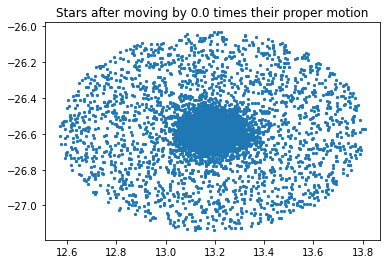

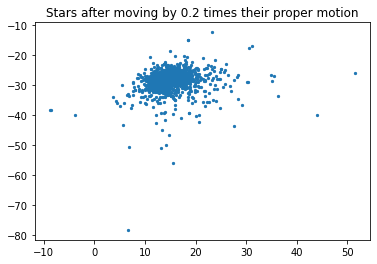

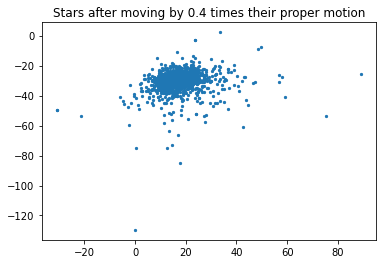

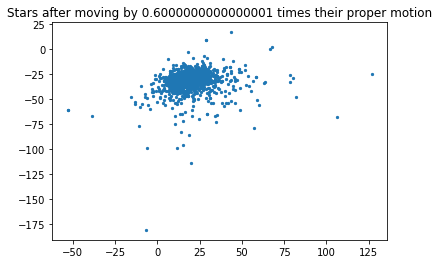

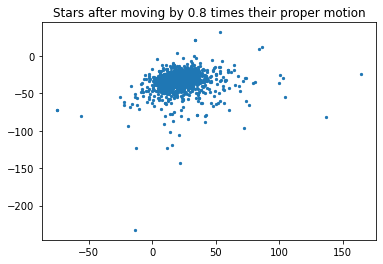

In [58]:
for p in np.arange(0, 1, 0.2):
    plt.scatter(ra+p*pmra, dec+p*pmdec, s=5)
    plt.title('Stars after moving by {} times their proper motion'.format(p))
    plt.show()

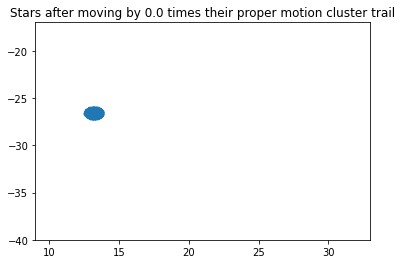

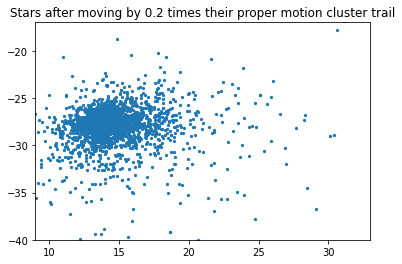

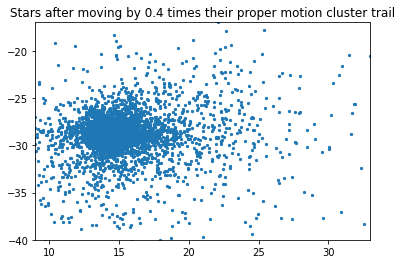

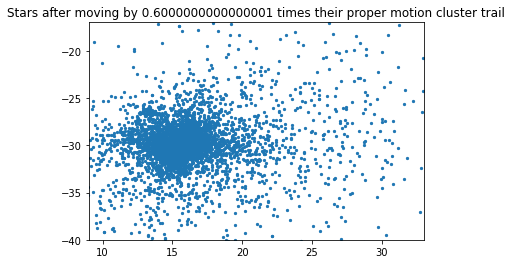

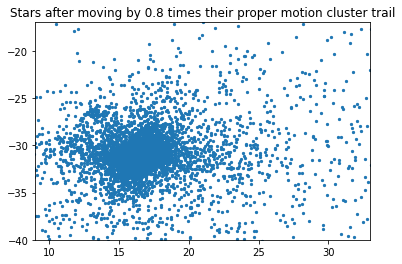

In [59]:
for p in np.arange(0, 1, 0.2):
    plt.scatter(ra+p*pmra, dec+p*pmdec, s=5)
    plt.title('Stars after moving by {} times their proper motion cluster trail'.format(p))
    plt.xlim(9,33)
    plt.ylim(-40,-17)
    plt.show()